# Pipelines


## O que são pipelines?

Pipelines em Scikit-Learn facilitam a aplicação sequencial de uma série de transformações e um estimador final. Eles são úteis para encapsular todo o processo de pré-processamento e modelagem em um único objeto.

## Qual a estrutura de um pipeline?

Um pipeline é composto por etapas sequenciais, cada uma contendo um nome (string) e uma instância de transformador ou estimador. A última etapa deve ser um estimador. A estrutura pode ser vista como:



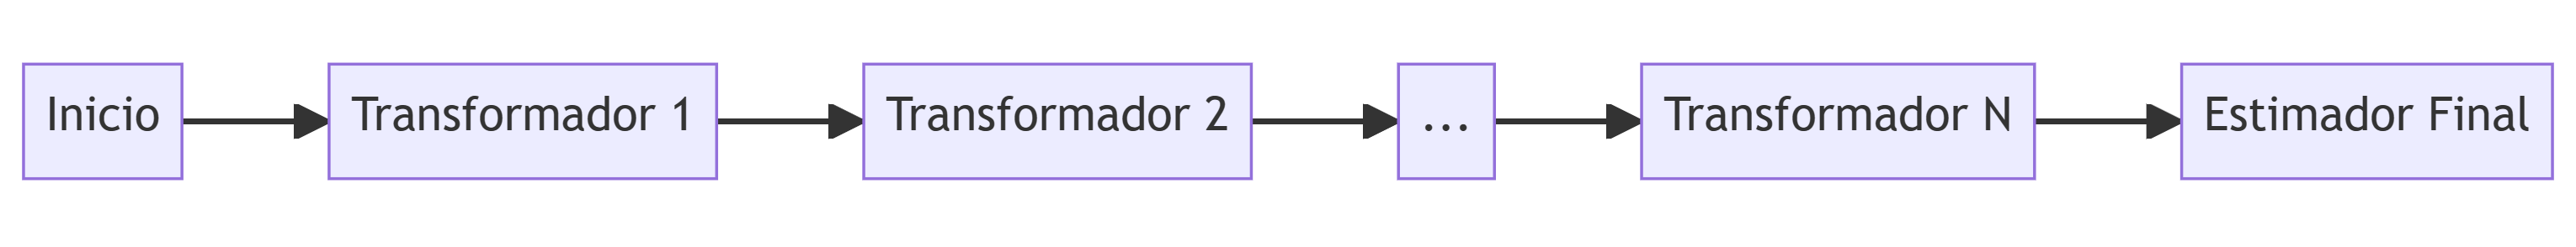

## Vantagens de usar pipeline

- **Conveniência**: Resume várias etapas em um único objeto.
- **Prevenção de vazamento de dados**: Garante que as informações do conjunto de teste não vazem para o conjunto de treinamento durante o ajuste e transformação.
- **Grid Search**: Facilita a pesquisa em grade através do espaço de hiperparâmetros.



A combinação de transformadores e estimadores em um único objeto através do uso de pipelines facilita o desenvolvimento, a compreensão e a manutenção do código de aprendizado de máquina. É uma prática recomendada especialmente para fluxos de trabalho mais complexos.

## Pipeline em um contexto mais amplo

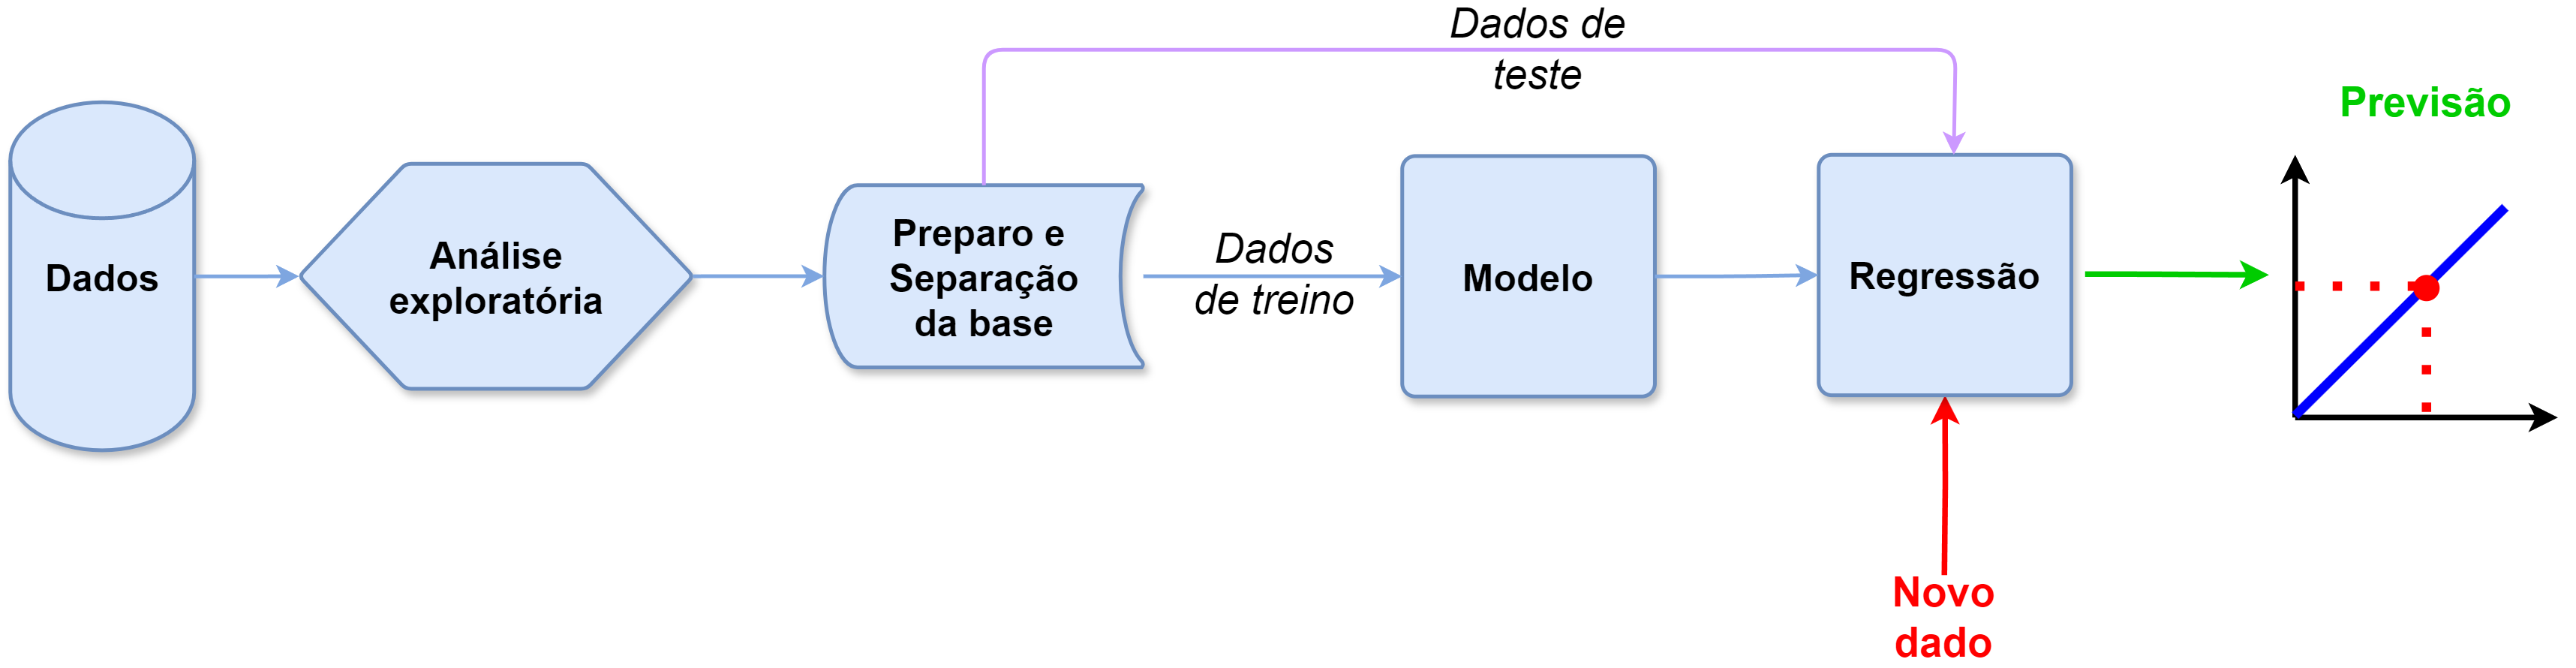

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from src.auxiliares import dataframe_coeficientes
from src.config import DADOS_TRATADOS
from src.graficos import plot_coeficientes, plot_residuos

sns.set_theme(palette="bright")

RANDOM_STATE = 42

In [11]:
df = pd.read_parquet(DADOS_TRATADOS)

df.head()

idade  sexo        imc  pressao_media  colesterol_total         ldl   hdl  \
0     59     2  32.099998          101.0               157   93.199997  38.0   
1     48     1  21.600000           87.0               183  103.199997  70.0   
2     72     2  30.500000           93.0               156   93.599998  41.0   
3     24     1  25.299999           84.0               198  131.399994  40.0   
4     50     1  23.000000          101.0               192  125.400002  52.0   

   colesterol_hdl  triglicerides  glicose  target  
0             4.0         4.8598       87     151  
1             3.0         3.8918       69      75  
2             4.0         4.6728       85     141  
3             5.0         4.8903       89     206  
4             4.0         4.2905       80     135

In [12]:
X = df.drop(columns="target")
y = df["target"]

https://scikit-learn.org/stable/modules/preprocessing.html#

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("reg", LinearRegression())
    ]
)

In [16]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('reg', LinearRegression())])

In [17]:
pipeline.score(X_test, y_test)

0.4526028037071228

In [18]:
pipeline.named_steps

{'scaler': StandardScaler(), 'reg': LinearRegression()}

In [19]:
pipeline["reg"]

LinearRegression()

In [20]:
pipeline["reg"].coef_

array([  1.753759 , -11.511808 ,  25.607132 ,  16.828873 , -44.448914 ,
        24.641018 ,   7.6770077,  13.13878  ,  35.16122  ,   2.3513534],
      dtype=float32)

In [21]:
pipeline["reg"].intercept_

np.float32(153.73654)

In [22]:
coefs = dataframe_coeficientes(
    pipeline["reg"].coef_,
    X.columns
)

coefs

coeficiente
colesterol_total   -44.448914
sexo               -11.511808
idade                1.753759
glicose              2.351353
hdl                  7.677008
colesterol_hdl      13.138780
pressao_media       16.828873
ldl                 24.641018
imc                 25.607132
triglicerides       35.161221

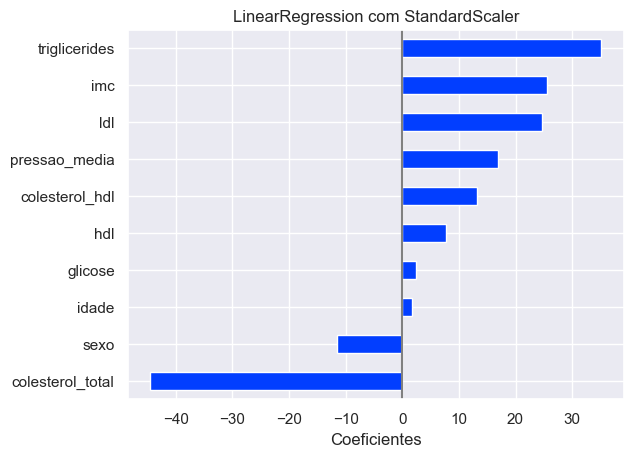

In [23]:
plot_coeficientes(coefs, "LinearRegression com StandardScaler")

In [38]:
pipeline["scaler"]

StandardScaler()

In [42]:
X

idade  sexo        imc  pressao_media  colesterol_total         ldl  \
0       59     2  32.099998     101.000000               157   93.199997   
1       48     1  21.600000      87.000000               183  103.199997   
2       72     2  30.500000      93.000000               156   93.599998   
3       24     1  25.299999      84.000000               198  131.399994   
4       50     1  23.000000     101.000000               192  125.400002   
..     ...   ...        ...            ...               ...         ...   
437     60     2  28.200001     112.000000               185  113.800003   
438     47     2  24.900000      75.000000               225  166.000000   
439     60     2  24.900000      99.669998               162  106.599998   
440     36     1  30.000000      95.000000               201  125.199997   
441     36     1  19.600000      71.000000               250  133.199997   

      hdl  colesterol_hdl  triglicerides  glicose  
0    38.0            4.00         4.8598       87  
1    70.0            3.00         3.8918       69  
2    41.0            4.00         4.6728       85  
3    40.0            5.00         4.8903       89  
4    52.0            4.00         4.2905       80  
..    ...             ...            ...      ...  
437  42.0            4.00         4.9836       93  
438  42.0            5.00         4.4427      102  
439  43.0            3.77         4.1271       95  
440  42.0            4.79         5.1299       85  
441  97.0            3.00         4.5951       92  

[442 rows x 10 columns]

In [40]:
pipeline["scaler"].transform(X)

array([[ 0.7917738 ,  1.0613699 ,  1.2701279 , ..., -0.06221033,
         0.3913575 , -0.4043973 ],
       [-0.0718379 , -0.9421786 , -1.127127  , ..., -0.8354584 ,
        -1.4561754 , -1.9476647 ],
       [ 1.8124058 ,  1.0613699 ,  0.9048321 , ..., -0.06221033,
         0.03444809, -0.57587147],
       ...,
       [ 0.87028396,  1.0613699 , -0.37370417, ..., -0.24005738,
        -1.0070797 ,  0.2814994 ],
       [-1.0139598 , -0.9421786 ,  0.79067713, ...,  0.54865557,
         0.9068729 , -0.57587147],
       [-1.0139598 , -0.9421786 , -1.5837471 , ..., -0.8354584 ,
        -0.11385107,  0.02428813]], dtype=float32)

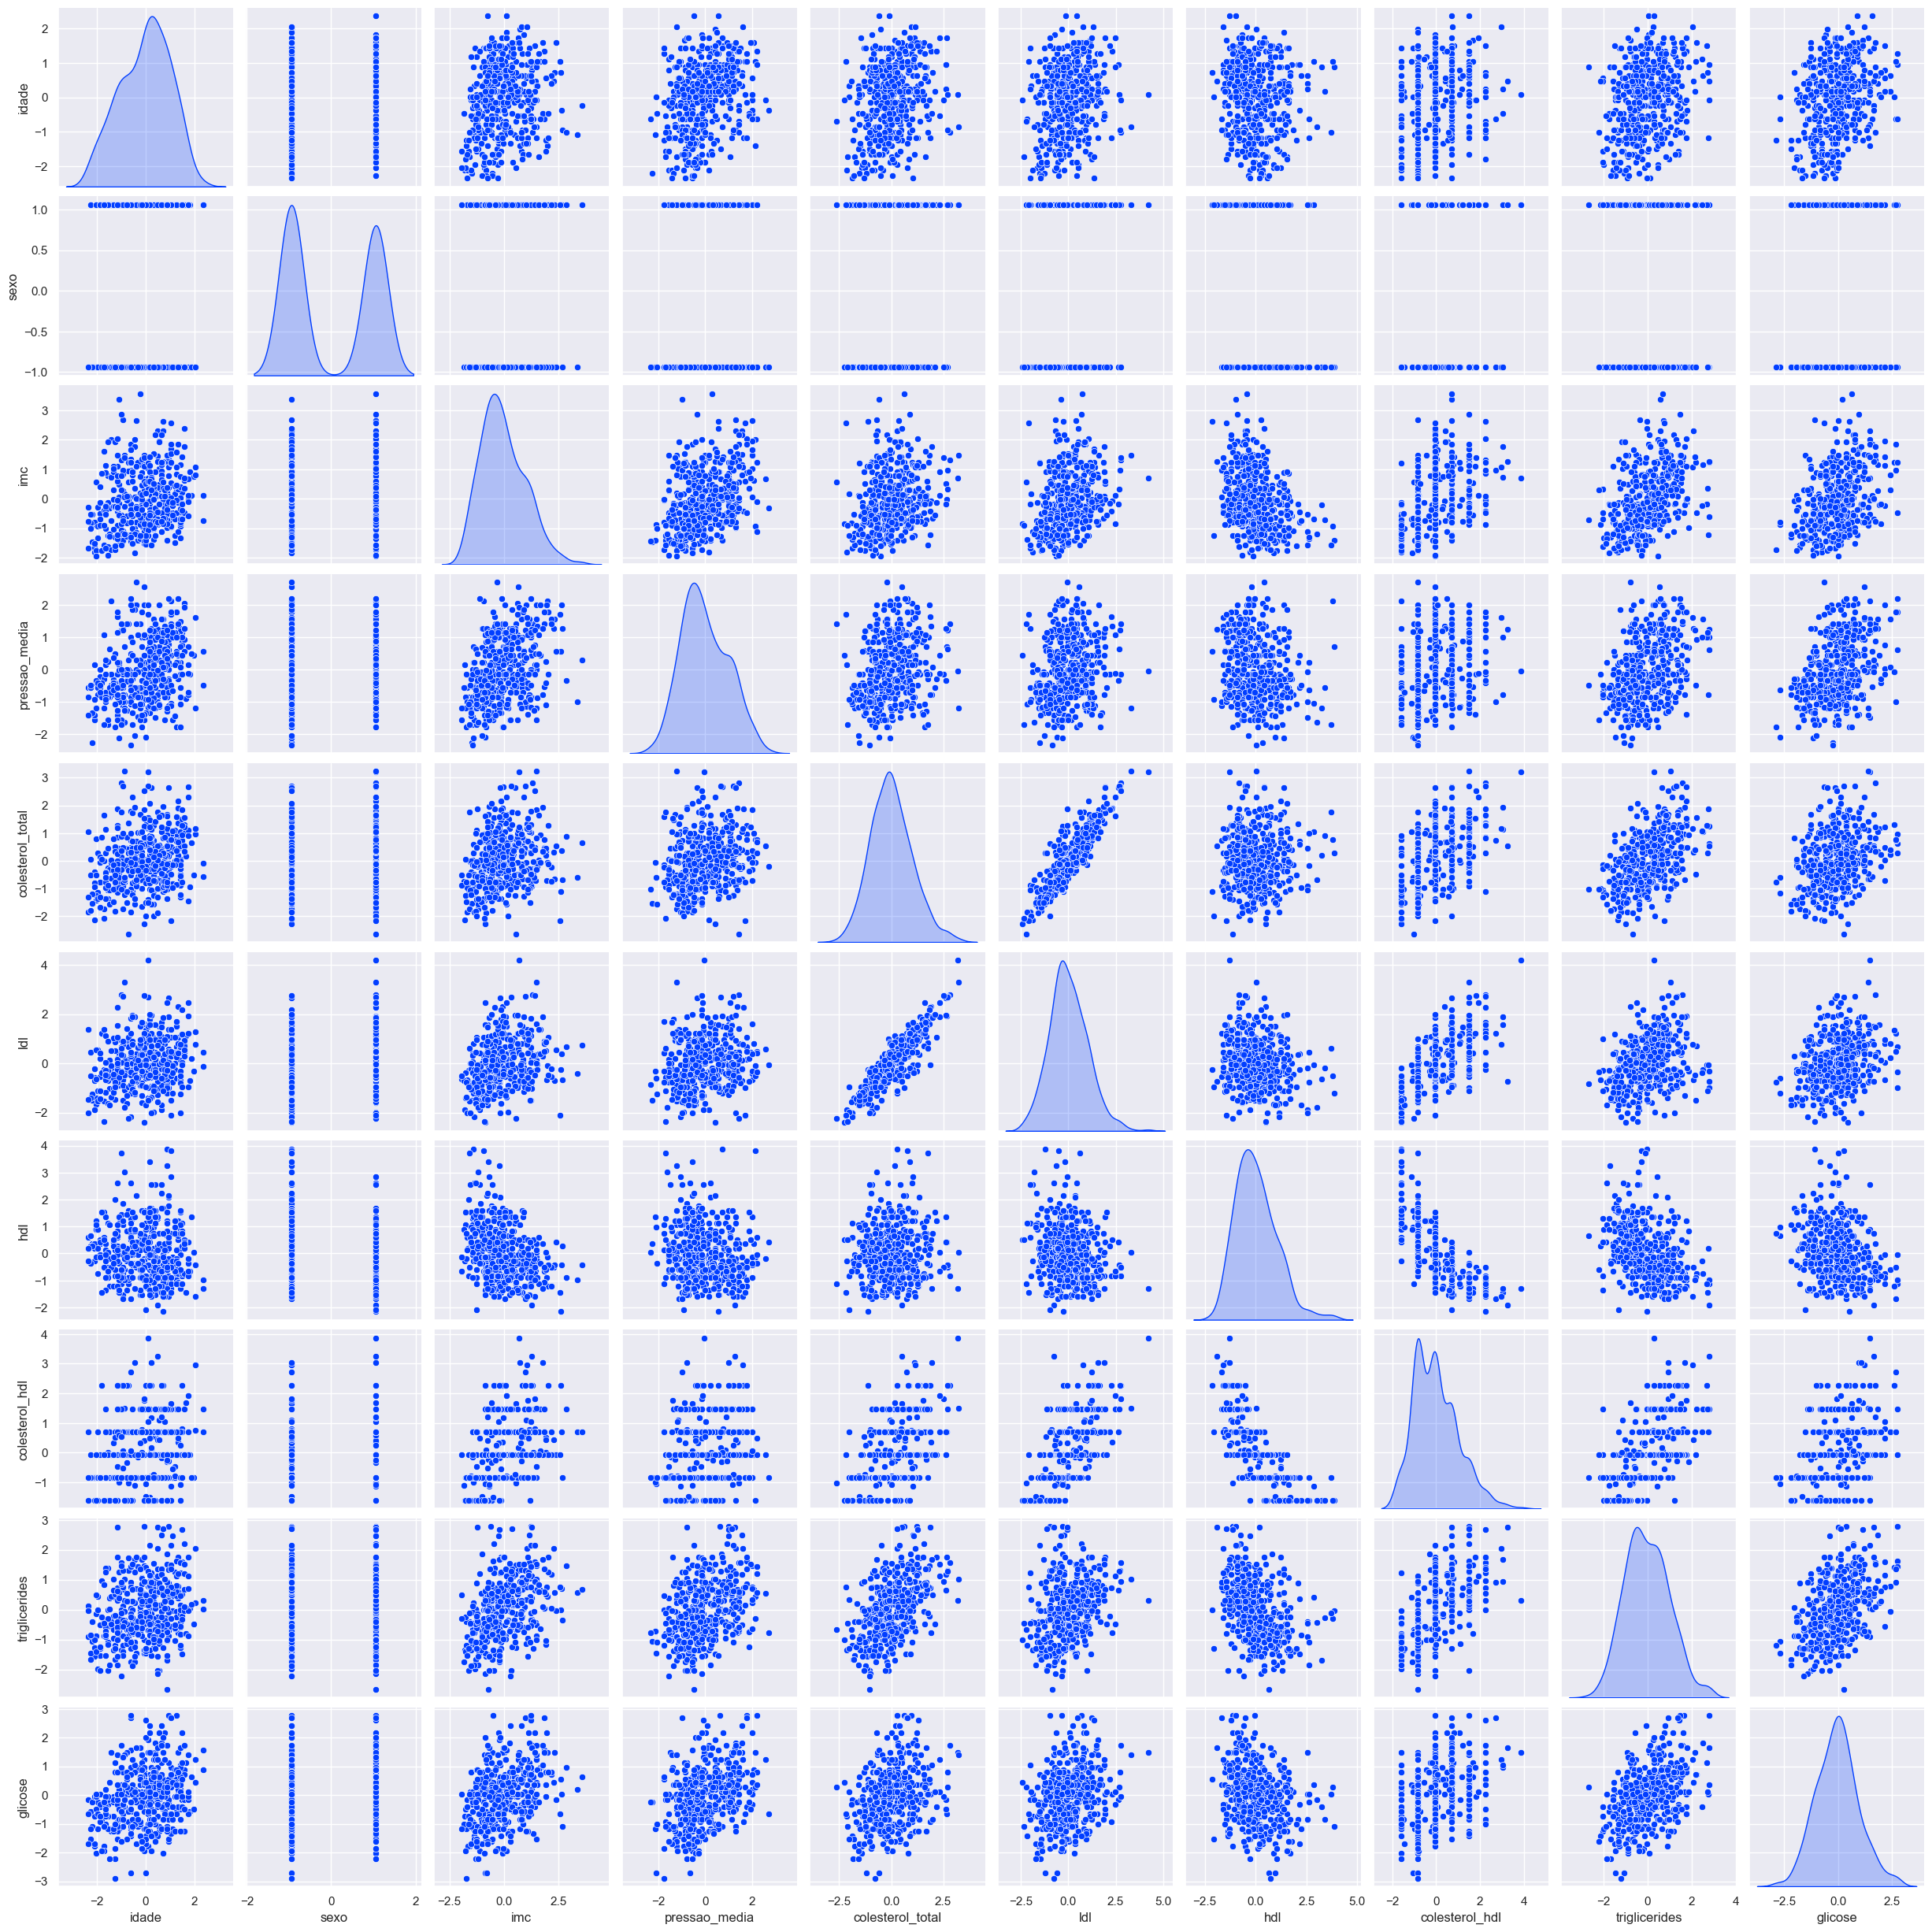

In [44]:
X_scaled = pipeline["scaler"].transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

sns.pairplot(X_scaled, diag_kind="kde")

In [46]:
X_scaled.mean()

idade              -0.031162
sexo               -0.003865
imc                -0.036766
pressao_media      -0.024367
colesterol_total    0.011641
ldl                 0.016946
hdl                 0.021053
colesterol_hdl     -0.007891
triglicerides      -0.025462
glicose            -0.039142
dtype: float32

In [48]:
X_scaled.std()

idade               1.029192
sexo                1.000895
imc                 1.008701
pressao_media       0.983864
colesterol_total    0.997925
ldl                 1.001164
hdl                 1.013668
colesterol_hdl      0.997838
triglicerides       0.997039
glicose             0.985662
dtype: float32

In [53]:
y_pred = pipeline.predict(X_test)

In [55]:
mean_absolute_error(y_test, y_pred)

np.float32(42.794098)

In [57]:
mean_squared_error(y_test, y_pred)

np.float32(2900.1936)

In [59]:
root_mean_squared_error(y_test, y_pred)

np.float32(53.853447)

In [61]:
r2_score(y_test, y_pred)

0.4526028037071228

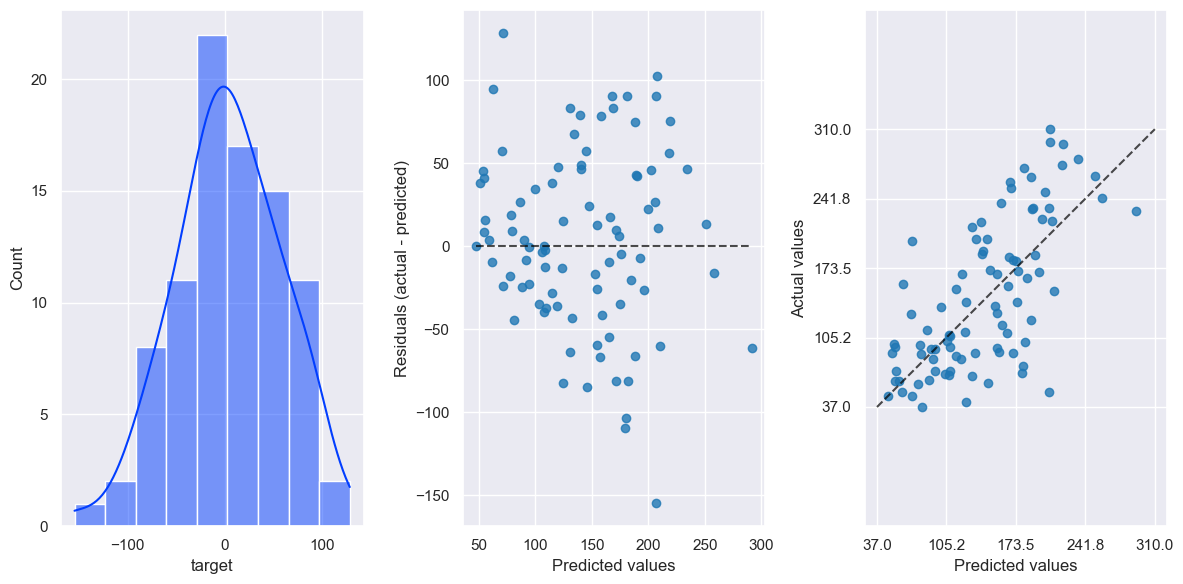

In [66]:
plot_residuos(y_test, y_pred)